In [1]:
import os
import pymzml
import matplotlib.pyplot as plt
import numpy as np

mzml_file = 'data/TQ8_201023SJ01_0103.mzML'

In [2]:
import pymzml
run = pymzml.run.Reader(
    mzml_file
)


In [4]:
tot_int = []
max_int = []
for spec in run:
    tot_int.append(sum(spec.i))
    max_int.append(max(spec.i))

In [13]:
max_int = np.array(max_int)
tot_int = np.array(tot_int)

In [34]:
print(sum(tot_int<=8000000))

3137


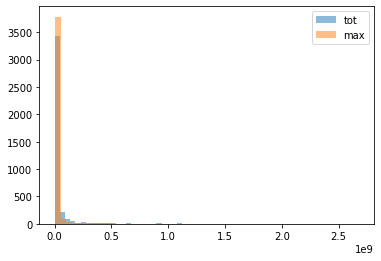

In [31]:
plt.hist(tot_int[tot_int>=5000000], 60, alpha=0.5, label='tot')
plt.hist(max_int[tot_int>=5000000], 10, alpha=0.5, label='max')
plt.legend(loc='upper right')
plt.show()

In [3]:
spec1 = list(run)[0]
spec2 = list(run)[1000]

In [19]:
spec1

<__main__.Spectrum object with native ID 1 at 0x1da1566afd0>

In [18]:
run[1]

AttributeError: 'NoneType' object has no attribute 'calling_instance'

In [8]:
spec = spec1 + spec2

In [ ]:
spec._i

In [15]:
(spec._i - spec1._i).sum()

0.0

In [3]:
i=0
for spec in run:
    s += spec
    if i > 5: break
    i += 1

print(s.mz)
print(spec.mz)

[]
[ 35.95897293  37.09222794  38.16328049  39.05881882  40.02801895
  41.10074234  42.12324905  43.13564301  44.05424118  45.0737648
  46.01107407  47.0223732   48.03359985  49.17651749  50.06753159
  51.04703522  52.10795593  53.10347366  54.07386398  55.0929718
  56.09614182  57.12398148  57.85616302  58.77377319  59.59680176
  60.1109314   61.05810547  62.0464859   63.15043259  64.03349304
  65.16548157  66.11042023  67.06124878  67.98405457  69.14320374
  70.14834595  71.12682343  71.97811127  73.01160431  74.15724182
  75.01638794  76.13127899  77.06726837  78.0157547   79.16459656
  80.1437149   81.07824707  82.03173065  83.0510025   83.86672974
  84.43501282  85.1771698   85.9169693   86.87984467  88.19624329
  89.02085114  90.19934082  91.02121735  92.1581192   92.99466705
  94.17640686  95.14533234  96.06445312  96.9006424   98.07428741
  99.90157318 100.7410202  101.93578339 103.02366638 104.10804749
 105.12631226 106.12712097 107.12879944 107.65298462 108.95670319
 110.2032

In [41]:
msrun = pymzml.run.Reader(mzml_file,
    MS1_Precision = 5e-6 ,
    MSn_Precision = 20e-6)
msrun.get_spectrum_count()

6111

In [42]:
spec_tot = list(msrun)[0]
for spec in list(msrun)[1:]:
    spec_tot += spec

TypeError: 'NoneType' object is not subscriptable

In [30]:
spec_tot.i+spec1.i

array([2.61074615e+02, 4.78831641e+04, 3.42015742e+04, 5.17208008e+04,
       2.49996016e+05, 1.29026170e+07, 3.95087562e+05, 2.40946766e+05,
       4.63567594e+05, 5.92751100e+06, 1.01641039e+05, 2.83407422e+04,
       2.34662832e+04, 2.62097012e+04, 1.48406768e+04, 3.71214453e+04,
       3.75498945e+04, 1.65229785e+04, 6.08939180e+04, 2.85129238e+04,
       1.01319906e+05, 1.47600047e+05, 1.48209219e+04, 2.10981914e+04,
       1.27995967e+04, 1.49124854e+04, 4.06480884e+03, 5.85682715e+03,
       2.09588457e+04, 1.18054844e+04, 2.32004023e+04, 1.01055625e+04,
       3.58019258e+04, 1.65534121e+04, 2.42273496e+04, 1.75603379e+04,
       4.46603088e+02, 6.72680859e+03, 7.01057373e+03, 3.30200664e+04,
       5.81064502e+03, 1.48593623e+04, 1.12747920e+04, 4.87333906e+04,
       1.82842988e+04, 3.49215312e+04, 8.78951172e+03, 2.81640234e+04,
       2.06088770e+04, 1.30136885e+04, 7.16700488e+03, 3.22125488e+03,
       2.80294824e+03, 4.64862305e+03, 9.44860449e+03, 1.39178389e+04,
      

In [16]:

p = pymzml.plot.Factory()
p.new_plot()
p.add(list(zip(spec_tot.mz, spec_tot.i)), color=(0, 0, 0), style="sticks", name="peaks")
filename = "./img/example_plot_{0}_{1}.html".format(
    os.path.basename(mzml_file), "total"
)
p.save(filename=filename)
print("Plotted file: {0}".format(filename))

1 1
Plotted file: ./img/example_plot_TQ8_201023SJ01_0103.mzML_total.html


In [5]:
spec1 = list(msrun)[0]
spec2 = list(msrun)[2000]
p = pymzml.plot.Factory()
p.new_plot()
# p.add(spec.peaks("raw"), color=(0, 0, 0), style="sticks", name="peaks")
p.add(list(zip(spec1.mz, spec1.i)), color=(0, 0, 0), style="sticks", name="peaks")
p.add(list(zip(spec2.mz, spec2.i)), color=(0, 0, 0), style="sticks", name="peaks")
filename = "./img/example_plot_{0}_{1}and{2}.html".format(
    os.path.basename(mzml_file), spec1.ID, spec2.ID
)
p.save(filename=filename)
print("Plotted file: {0}".format(filename))

1 1
Plotted file: ./img/example_plot_TQ8_201023SJ01_0103.mzML_1and2001.html
